# Binary classification based on Logistic Regression with a quadratic regularization

## import library

In [253]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load data

In [254]:
fname_data_train    = 'assignment_10_data_train.csv'
fname_data_test     = 'assignment_10_data_test.csv'

data_train  = np.genfromtxt(fname_data_train, delimiter=',')
data_test   = np.genfromtxt(fname_data_test, delimiter=',')
print(data_train.shape)

(500, 3)


## plot the data

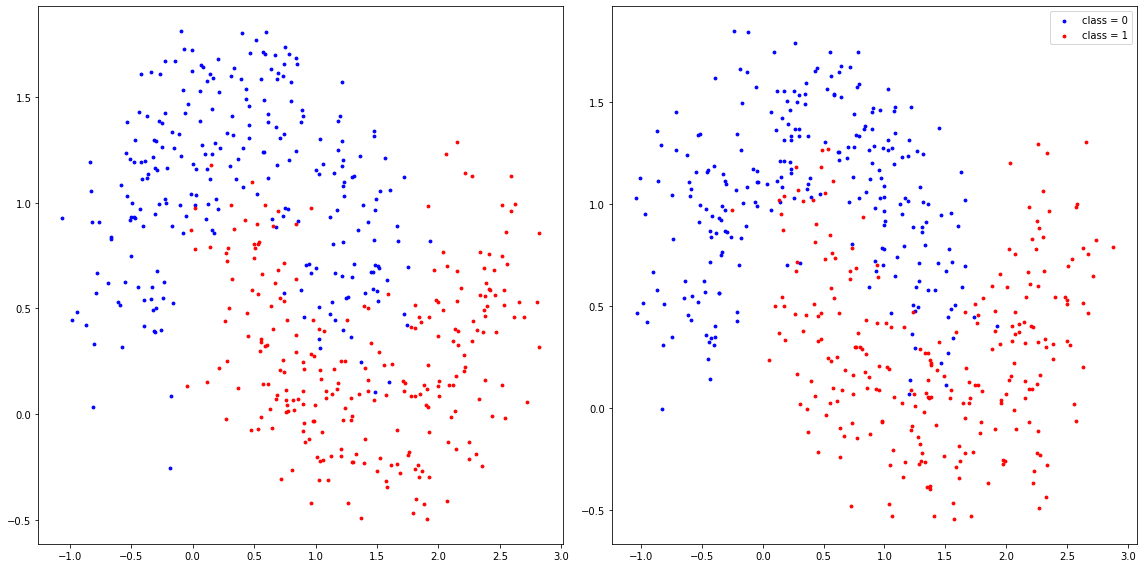

In [255]:
    train_x = data_train[: , 0]
    train_y = data_train[: , 1]
    train_label = data_train[:, 2]

    test_x = data_test[: , 0]
    test_y = data_test[: , 1]
    test_label = data_test[: , 2]

    plt.figure(figsize=(16,8))
    plt.subplot(121)
    class_0 = np.where(train_label == 0)
    class_1 = np.where(train_label == 1)
    plt.scatter(train_x[class_0], train_y[class_0], label = 'class = 0', color='blue', s=8)
    plt.scatter(train_x[class_1], train_y[class_1], label = 'class = 1', color='red',s=8)


    plt.subplot(122)
    class_0 = np.where(test_label == 0)
    class_1 = np.where(test_label == 1)
    plt.scatter(test_x[class_0], test_y[class_0], label = 'class = 0', color='blue', s=8)
    plt.scatter(test_x[class_1], test_y[class_1], label = 'class = 1', color='red',s=8)

    plt.axis('auto')
    plt.legend()
    plt.tight_layout()
    plt.show()

## define feature function

In [256]:
def feature_function(x, y):
    oneVector = np.ones(x.shape)
    feature = np.vstack((oneVector, x ,np.power(x,2), np.power(x,3), np.power(x,4), np.power(x,5), y))
    return feature
print(feature_function(train_x, train_y))


[[1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [1.24997125e+00 1.40069243e+00 1.50240279e+00 ... 1.47130689e-01
  6.95858115e-01 6.55950311e-01]
 [1.56242814e+00 1.96193927e+00 2.25721413e+00 ... 2.16474397e-02
  4.84218516e-01 4.30270810e-01]
 ...
 [2.44118169e+00 3.84920571e+00 5.09501563e+00 ... 4.68611646e-04
  2.34467572e-01 1.85132970e-01]
 [3.05140694e+00 5.39155328e+00 7.65476568e+00 ... 6.89471545e-05
  1.63156162e-01 1.21438029e-01]
 [5.51167920e-01 5.70863747e-01 5.82709872e-01 ... 1.17685185e+00
  9.63050337e-01 8.87891317e-01]]


## define regression function based on the feature function

In [257]:
def regression_function(theta, feature):
    value = np.matmul(theta, feature)
    return value

## define regularization function on the model parameters

In [258]:
temp = np.array([1,2,3])
sum = np.sum(np.power(temp,2))
print(sum)



14


In [259]:
def regularization_function(theta):
    value = np.sum(np.power(theta,2))
    return value
print(regularization_function([1,2,3,4,5,6,7]))

140


## define sigmoid function

In [260]:
def logistic_function(x):
    z = 1 / (1+ np.exp(-x))
    return z

## define loss function where $\alpha$ is a weight for the quadratic regularization term (Note that you need to add a small number (np.finfo(float).eps) inside logarithm function in order to avoid $\log( 0 )$)

In [261]:
print(np.finfo(float).eps)

2.220446049250313e-16


In [262]:
def compute_loss_feature(theta, feature, label, alpha):
    f = regression_function(theta, feature)
    h = logistic_function(f)

    loss = (np.sum((-label * np.log(h + np.finfo(float).eps)) - ((1-label) * np.log(1-h + np.finfo(float).eps))) / 500 ) + (alpha*(regularization_function(theta) / 2))
    return loss

## define gradient vector for the model parameters with the quadratic regularization term whose weight is $\alpha$

In [263]:
def compute_gradient_feature(theta, feature, label, alpha):
    f = regression_function(theta, feature)
    h = logistic_function(f)
    residual = h - label
    oneVector = np.ones(500)
    xList = np.vstack((feature))
    xList = np.transpose(xList)
    regularizeVector = [float(t) * alpha for t in theta]
    gradient = ((np.dot(residual, xList)) / 500) + regularizeVector 
   
    return gradient
feature1 = feature_function(train_x, train_y)
compute_gradient_feature([0,0,0,0,0,0,0], feature1, train_label, 0.1)

array([ 0.        , -0.25717931, -0.47049042, -1.12254338, -2.5521064 ,
       -6.00838772,  0.19504532])

## compute the accuracy

In [264]:
def compute_accuracy(theta, feature, label):
    predict_label = logistic_function(regression_function(theta, feature))
    predict_label[predict_label >= 0.5] = 1
    predict_label[predict_label < 0.5 ] = 0
    correct_label_number = predict_label == label
    accuracy = round(len(correct_label_number[correct_label_number == True]) / feature.shape[1], 5)
    #print('{:.5f}'.format(accuracy))
    #print(predict_label)
    return accuracy

## gradient descent for the model parameters $\theta$

In [283]:
num_iteration   = 30000
learning_rate   = 0.3
alpha           = 0.0

dim_feature     = 7
theta = np.zeros(dim_feature)

feature_train = feature_function(train_x, train_y)
feature_test = feature_function(test_x, test_y)


In [284]:
theta_iteration             = np.zeros((num_iteration, dim_feature))
loss_iteration_train        = np.zeros(num_iteration)
loss_iteration_test         = np.zeros(num_iteration)   
accuracy_iteration_train    = np.zeros(num_iteration)  
accuracy_iteration_test     = np.zeros(num_iteration)

In [285]:
for i in range(num_iteration):
    theta  = theta - learning_rate * compute_gradient_feature(theta, feature_train, train_label, alpha)
    loss_train    = compute_loss_feature(theta, feature_train, train_label, alpha)
    accuracy_train = compute_accuracy(theta, feature_train, train_label)

    loss_test    = compute_loss_feature(theta, feature_test, test_label, alpha)
    accuracy_test = compute_accuracy(theta, feature_test, test_label)

    theta_iteration[i] = theta
    loss_iteration_train[i] = loss_train
    accuracy_iteration_train[i] = accuracy_train

    loss_iteration_test[i] = loss_test
    accuracy_iteration_test[i] = accuracy_test
    
    #print(theta_iteration[i])
    #print(loss_iteration_train[i])
    #print(accuracy_iteration_train[i])
theta_optimal = theta
feature_train = feature_function(train_x, train_y)
accuracy_train  = compute_accuracy(theta_optimal, feature_train, train_label)

feature_test = feature_function(test_x, test_y)
accuracy_test  = compute_accuracy(theta_optimal, feature_test, test_label)
print(accuracy_train)
print(accuracy_test)

0.942
0.932


## compute accuracy of the classifiers

In [268]:
accuracy_train  = compute_accuracy(theta_optimal, feature_train, train_label)
accuracy_test   = compute_accuracy(theta_optimal, feature_test, test_label)

## plot the results

In [269]:
def plot_loss_curve(loss_iteration_train, loss_iteration_test):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure

    plt.title('loss')

    plt.plot(range(0, len(loss_iteration_train)), loss_iteration_train, '-', color='red', label='train')
    plt.plot(range(0, len(loss_iteration_test)), loss_iteration_test, '-', color='blue', label='test')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [270]:
def plot_accuracy_curve(accuracy_iteration_train, accuracy_iteration_test):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('accuracy')

    plt.plot(range(0, len(accuracy_iteration_train)), accuracy_iteration_train, '-', color='red', label='train')
    plt.plot(range(0, len(accuracy_iteration_test)), accuracy_iteration_test, '-', color='blue', label='test')
    plt.xlabel('iteration')
    plt.ylabel('accuracy')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [271]:
def plot_data(data_train, data_test):
    
    f = plt.figure(figsize=(16,8))   
    train_x = data_train[: , 0]
    train_y = data_train[: , 1]
    train_label = data_train[:, 2]

    test_x = data_test[: , 0]
    test_y = data_test[: , 1]
    test_label = data_test[: , 2]

    plt.figure(figsize=(16,8))
    plt.subplot(121)
    class_0 = np.where(train_label == 0)
    class_1 = np.where(train_label == 1)
    plt.scatter(train_x[class_0], train_y[class_0], label = 'class = 0', color='blue', s=8)
    plt.scatter(train_x[class_1], train_y[class_1], label = 'class = 1', color='red',s=8)


    plt.subplot(122)
    class_0 = np.where(test_label == 0)
    class_1 = np.where(test_label == 1)
    plt.scatter(test_x[class_0], test_y[class_0], label = 'class = 0', color='blue', s=8)
    plt.scatter(test_x[class_1], test_y[class_1], label = 'class = 1', color='red',s=8)

    plt.axis('auto')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [275]:

def plot_model_parameter(theta_iteration):

    plt.figure(figsize=(8,6))
    plt.title('model parameter')
    colordata= {
    0: 'red', 1: 'blue', 2:'green', 3:'orange', 4:'purple', 5:'black', 6:'cyan'
    }
    for i in range(0, theta_iteration.shape[1]):
        label_ = r"${\theta_" + str(i) + "}$"
        plt.plot(range(0, len(theta_iteration)), theta_iteration[:, i], '-', color=colordata[i], label=label_)

    plt.xlabel('iteration')
    plt.legend(loc='center right')
    plt.tight_layout()
    plt.show()

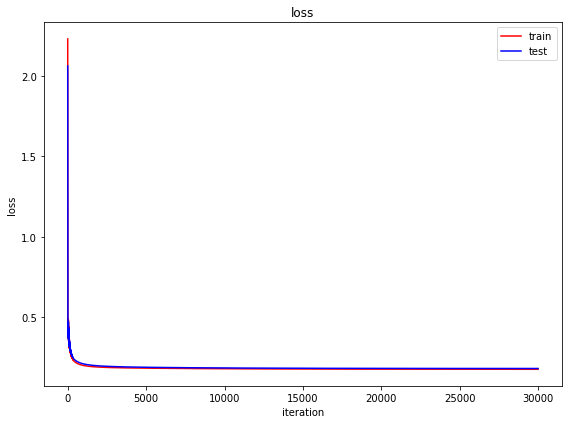

In [273]:
plot_loss_curve(loss_iteration_train, loss_iteration_test)

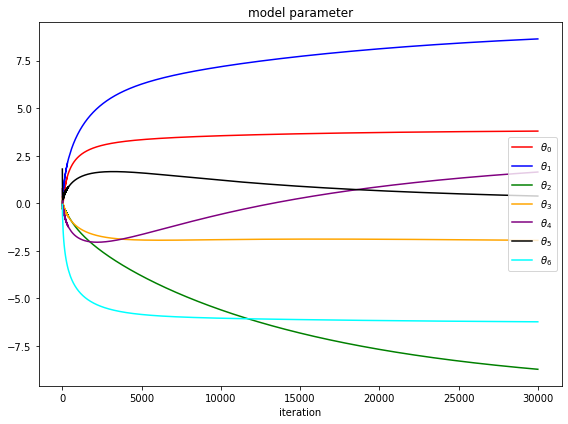

In [276]:
plot_model_parameter(theta_iteration)

In [289]:
def plot_classifier(data, theta):

    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure

    x = np.arange(-2, 3, 0.01)
    y = np.arange(-0.7, 2, 0.01)

    X_grid, Y_grid = np.meshgrid(x, y)
    
    label_grid = np.zeros((len(y),len(x)))
    for i in range(0, len(y)):
        for j in range(0, len(x)):
            feature_grid = feature_function(X_grid[i][j], Y_grid[i][j])
            label_grid[i][j] = regression_function(theta, feature_grid)

    cntr = plt.contourf(X_grid, Y_grid, label_grid, levels=np.arange(-20,20,1), cmap="RdBu_r")
    plt.colorbar(cntr)
    
    data_x = data[: , 0]
    data_y = data[: , 1]
    data_label = data[:, 2]

    class_0 = np.where(data_label == 0)
    class_1 = np.where(data_label == 1)
    plt.scatter(data_x[class_0], data_y[class_0], label = 'class = 0', color='blue', s=8)
    plt.scatter(data_x[class_1], data_y[class_1], label = 'class = 1', color='red',s=8)

    feature_y = -(theta[0] + theta[1] * x + theta[2] * np.power(x,2) + theta[3] * np.power(x,3) + theta[4] * np.power(x,4) + theta[5] * np.power(x,5))/theta[6]


    plt.plot(x, feature_y, '-' , color='k')


    plt.axis('auto')
    plt.legend()
    plt.tight_layout()
    plt.axis([-1.7, 2.5, -0.7, 2])
    plt.show()

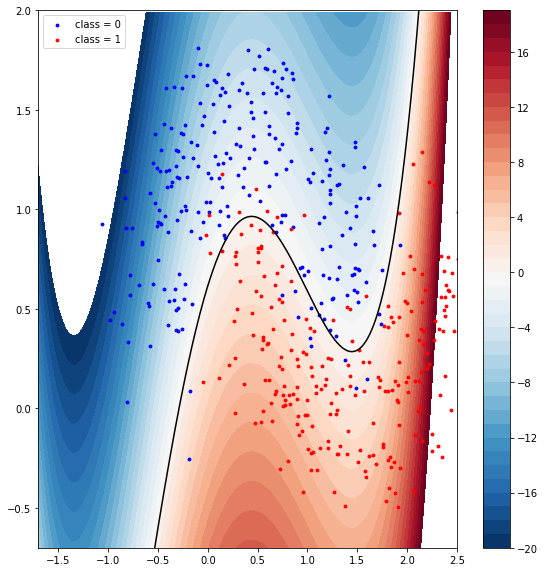

In [290]:
plot_classifier(data_train, theta_optimal)

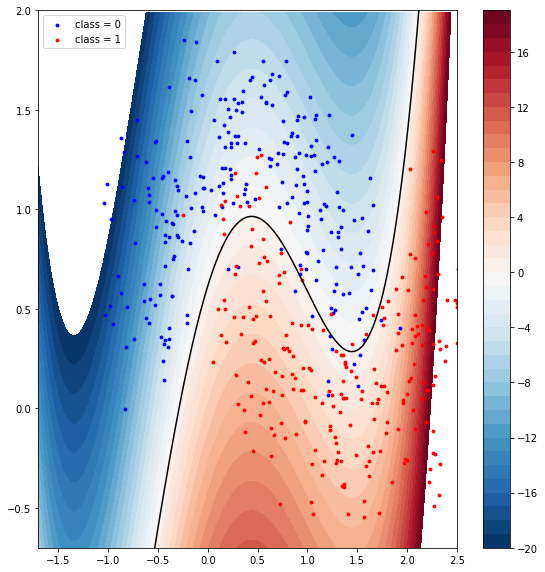

In [291]:
plot_classifier(data_test, theta_optimal)

***

# results

***

1. plot the input data (training on the left sub-figure and testing on the right sub-figure) in blue for class 0 and in red for class 1 from the file [assignment_10_data_train.csv] and [assignment_10_data_test.csv], respectively,

<Figure size 1152x576 with 0 Axes>

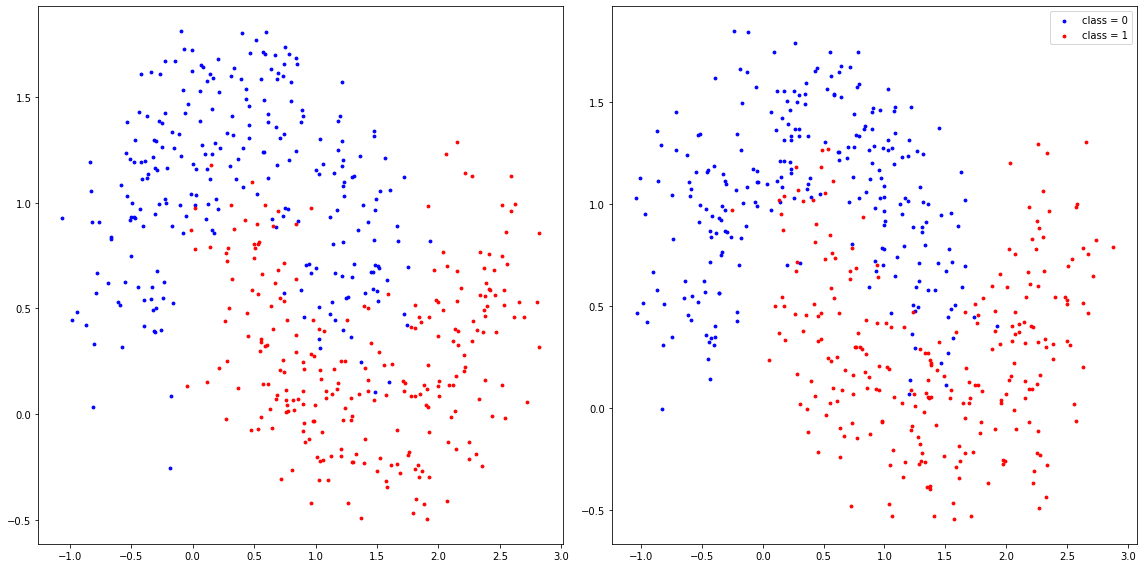

In [117]:
plot_data(data_train, data_test)

***

2. plot the values of the model parameters $\theta$ as curves over the gradient descent iterations using different colors

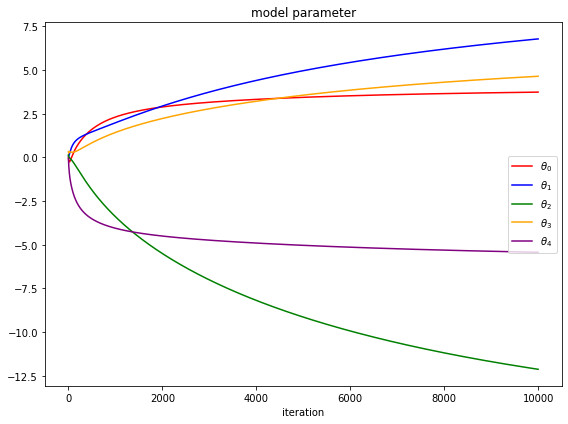

In [148]:
plot_model_parameter(theta_iteration)

***

3. plot the training loss in red curve and the testing loss in blue curve over the gradient descent iterations

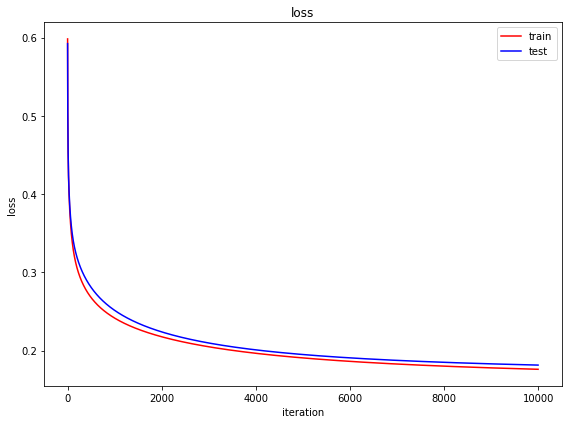

In [149]:
plot_loss_curve(loss_iteration_train, loss_iteration_test)

***

4. plot the training accuracy in red curve and the testing accuracy in blue curve over the gradient descent iterations

<Figure size 576x432 with 0 Axes>

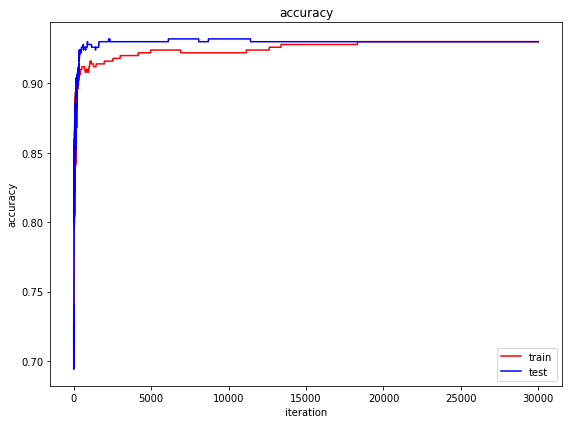

In [279]:
plot_accuracy_curve(accuracy_iteration_train, accuracy_iteration_test)

***

5. plot the classifier using the prediction values in the color coding scheme ranges from blue (class 0) to red (class 1) with the training data

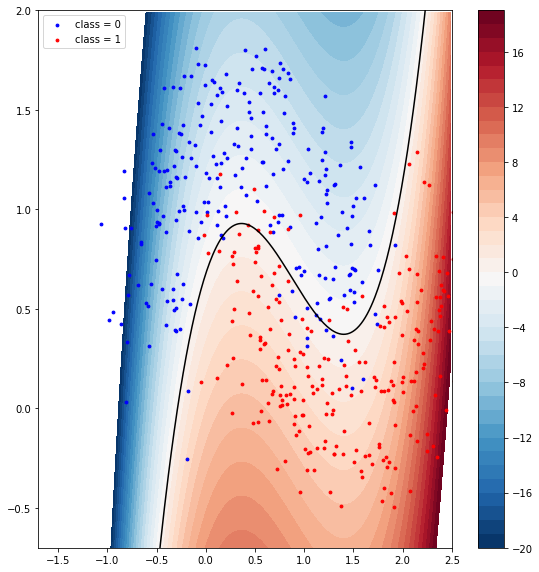

In [201]:
plot_classifier(data_train, theta_optimal)

***

6. plot the classifier using the prediction values in the color coding scheme ranges from blue (class 0) to red (class 1) with the testing data

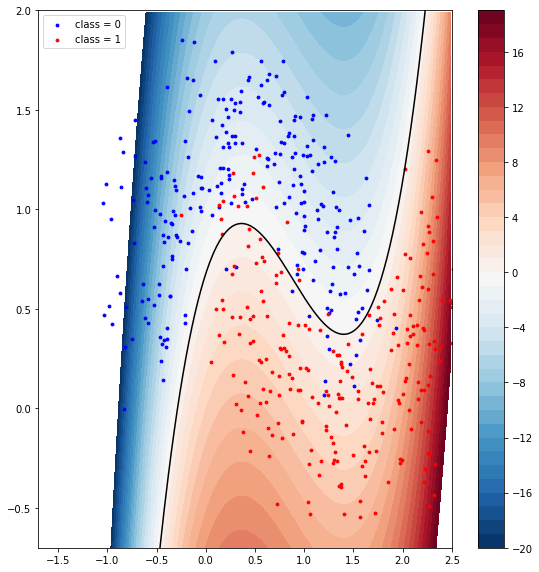

In [202]:
plot_classifier(data_test, theta_optimal)

***

7. print out the final training accuracy and the final testing accuracy in number with 5 decimal places (e.g. 0.98765)

In [218]:
print('accuract(train): {:.5f}'.format(accuracy_train))
print('accuracy(test) : {:.5f}'.format(accuracy_test))

accuract(train): 0.92800
accuracy(test) : 0.93400
